In [ ]:
# -*- coding: utf-8 -*-
"""CTGAN-Insurance.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/18vavq2Kt8HqhSnZvvFxJUc-70NCPeDU_

# Setup

In this tutorial we use the defaul version of the CTGAN:
https://github.com/sdv-dev/CTGAN

We also need to install table evaluator to evaluate the quality of the generated synthetic data.
"""

!pip install ctgan

!pip install table_evaluator


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

Gen. (0.05) | Discrim. (0.06): 100%|██████████| 200/200 [00:32<00:00,  6.20it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/usr/local/lib/python3.10/dist-packages/pandas-1.5.3.dist-info/METADATA'

Downloading...
From: https://drive.google.com/uc?id=1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 5.59MB/s]


Gen. (0.24) | Discrim. (-0.05): 100%|██████████| 200/200 [00:32<00:00,  6.12it/s]


(1338, 7) (1000, 7)


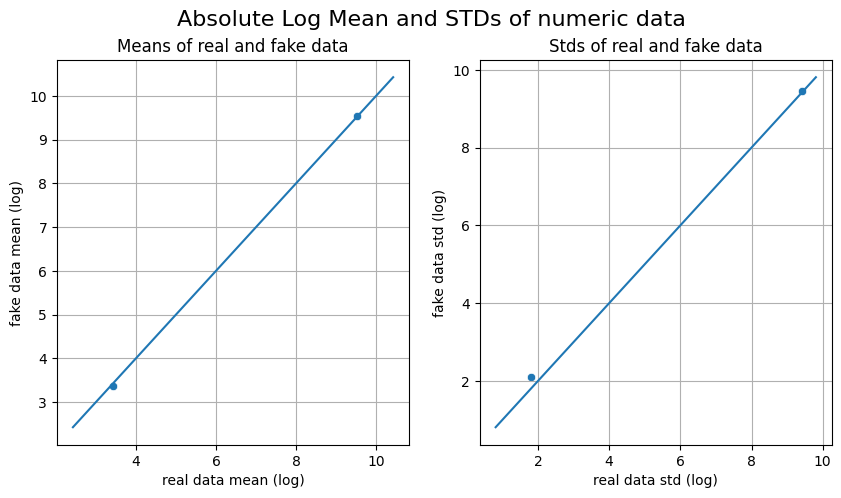

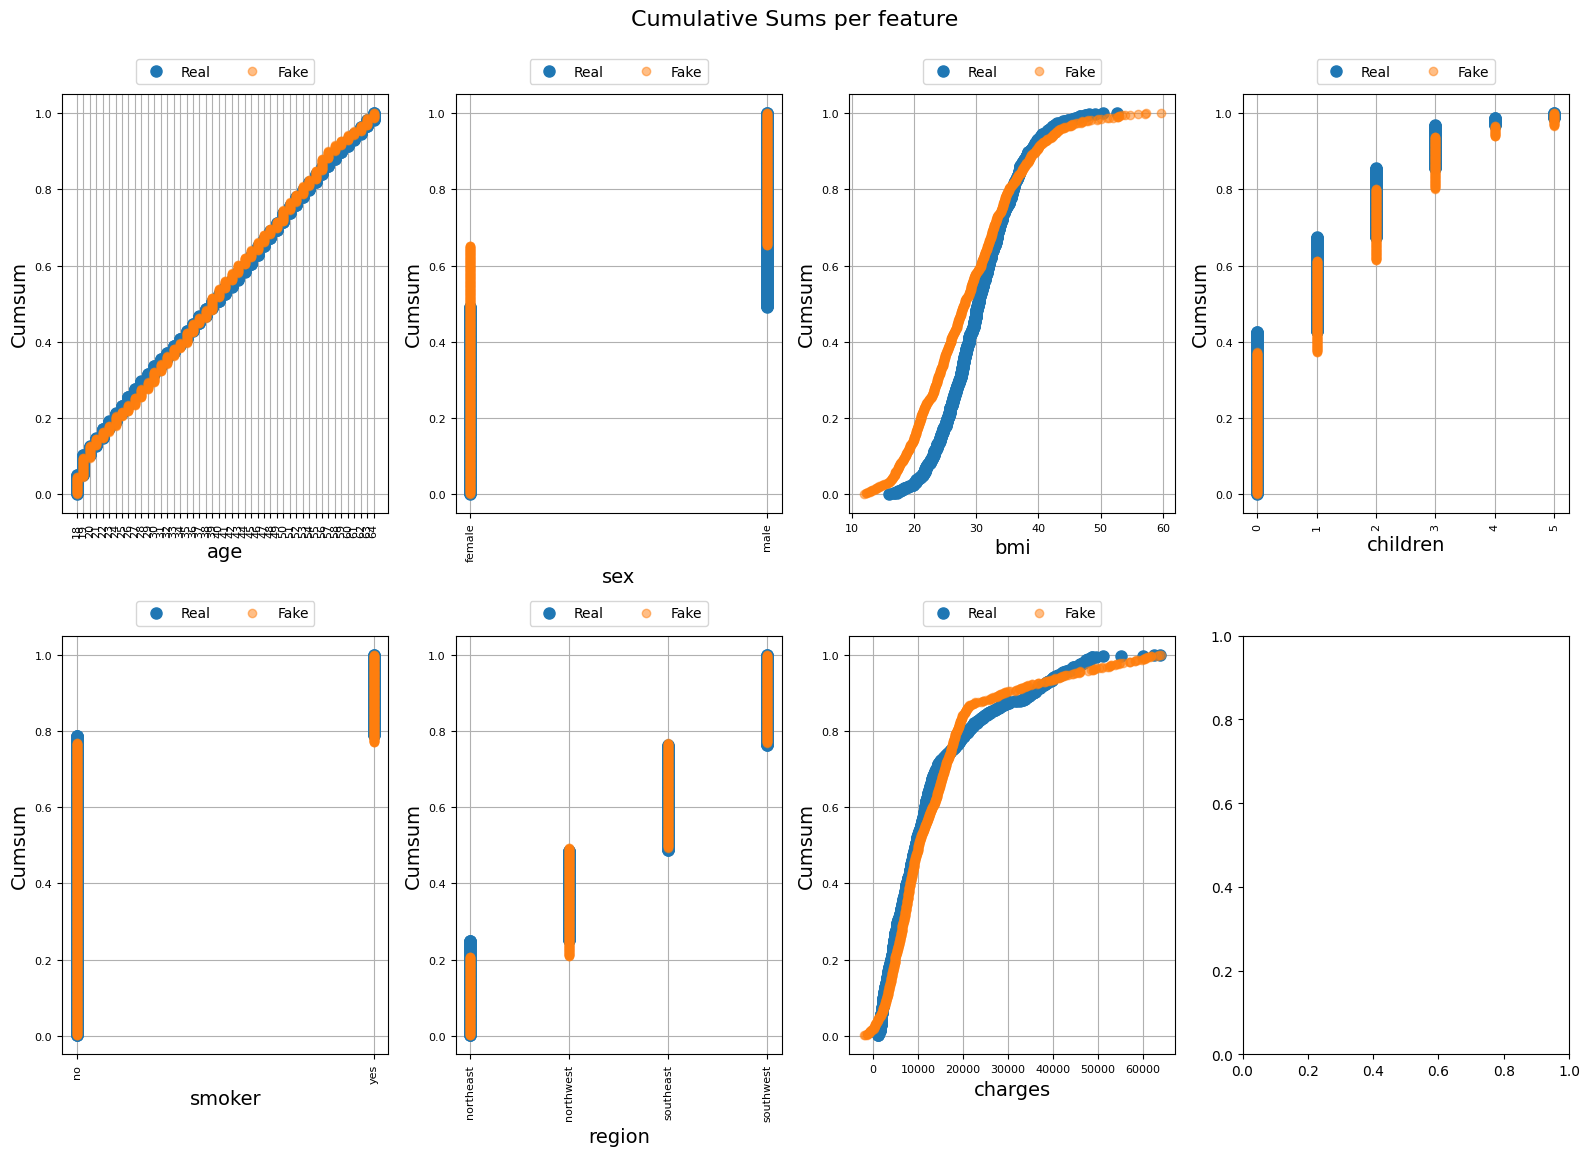

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormat

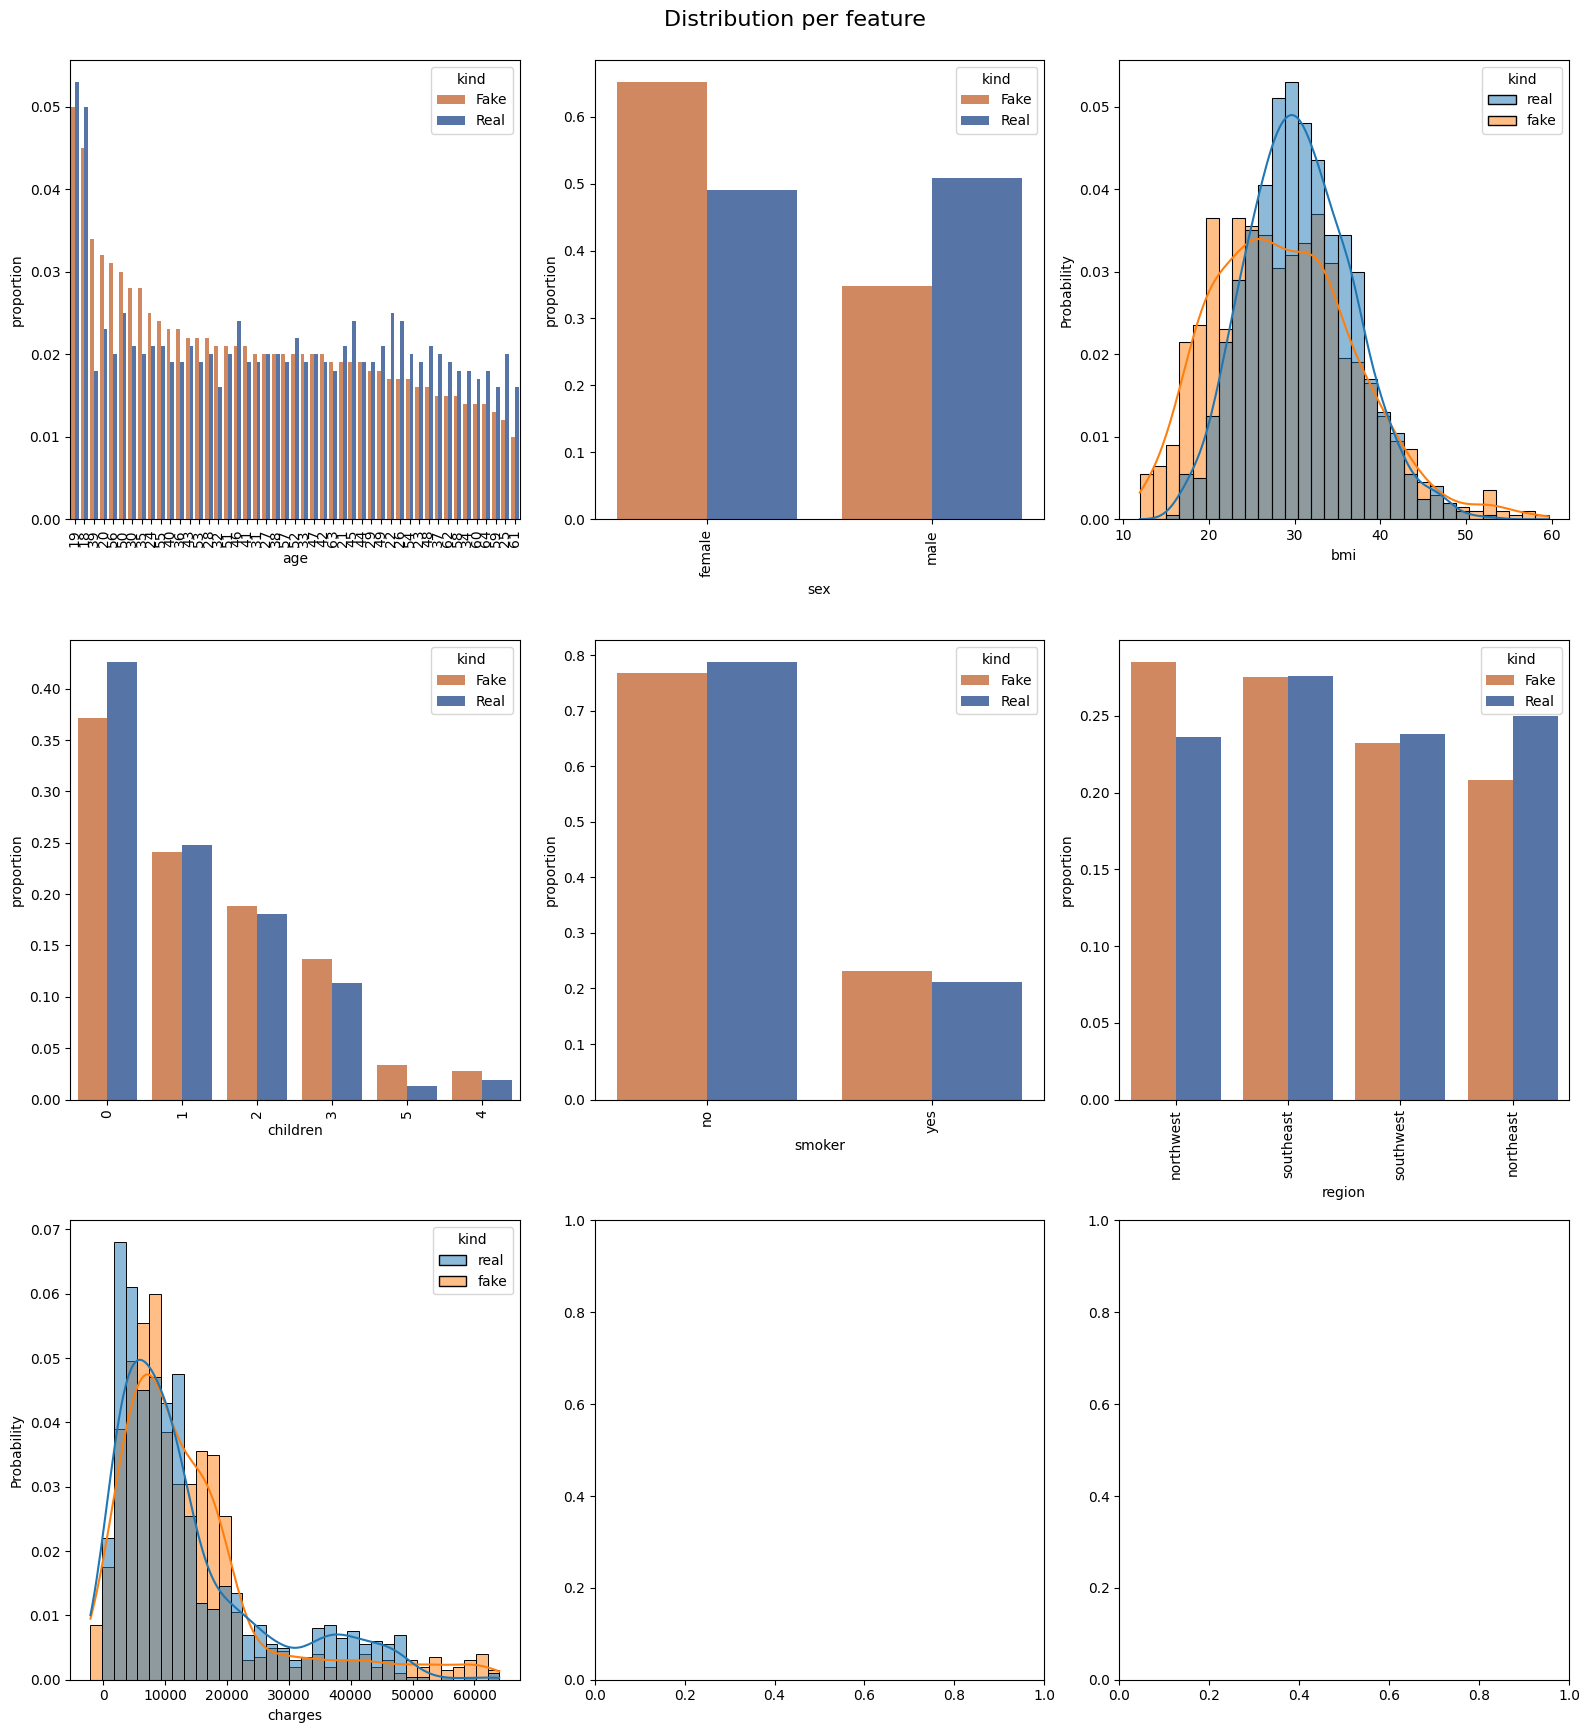

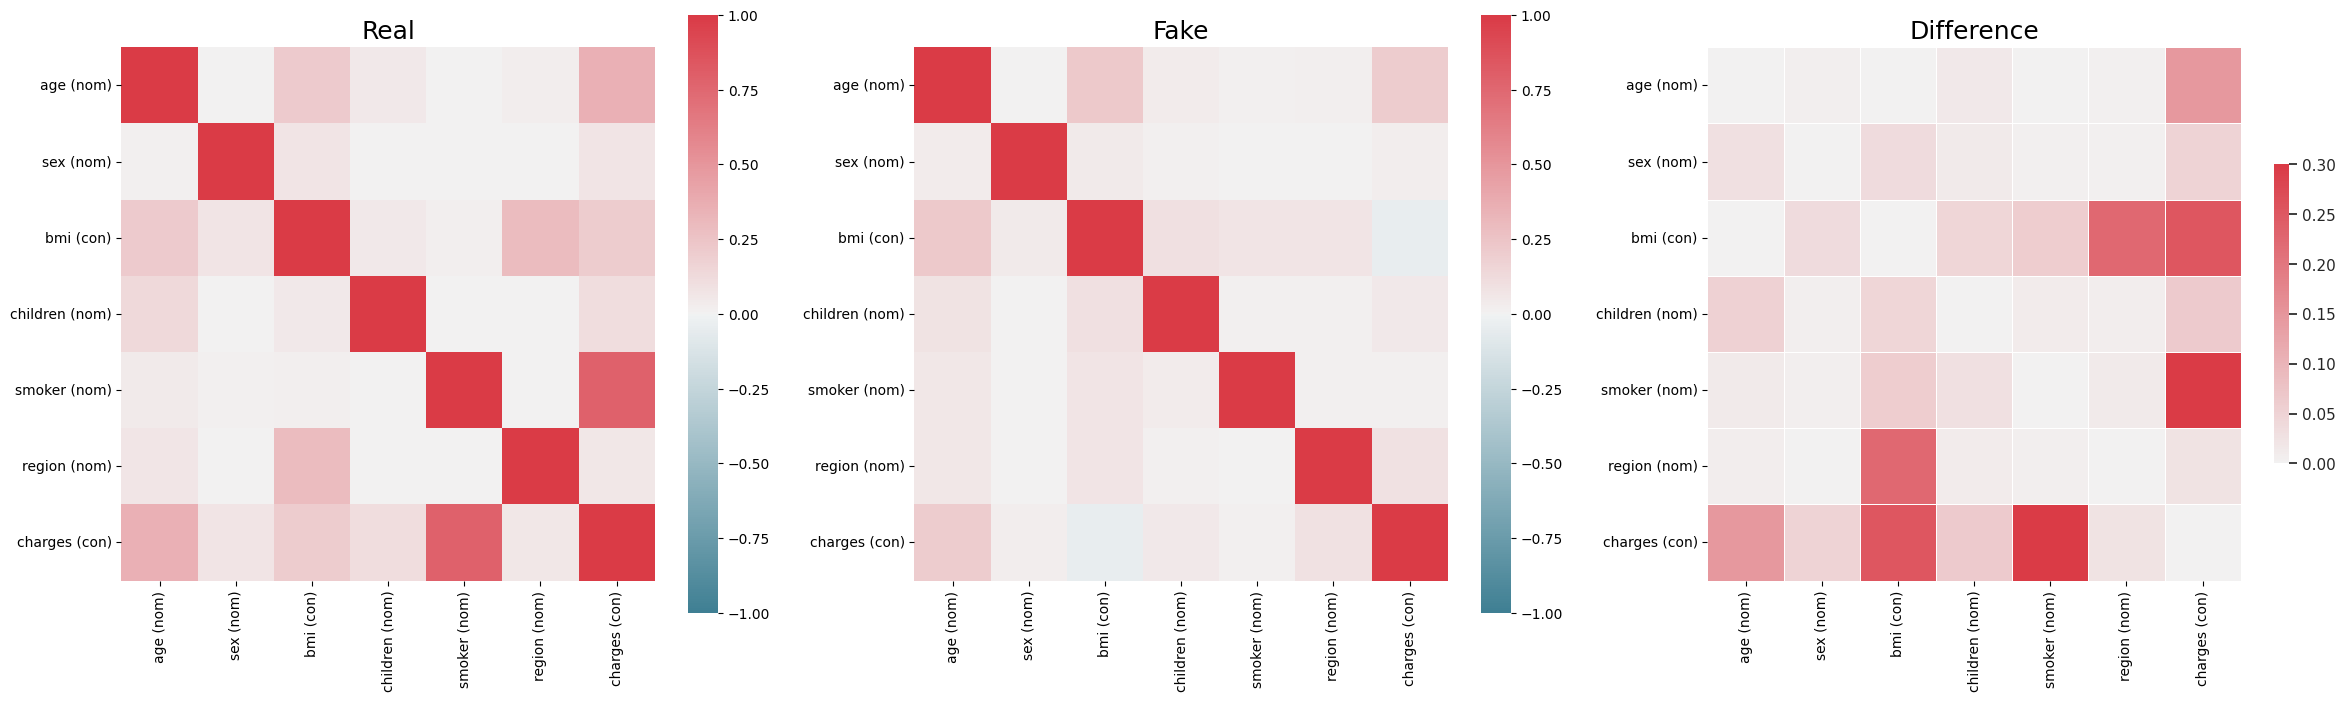

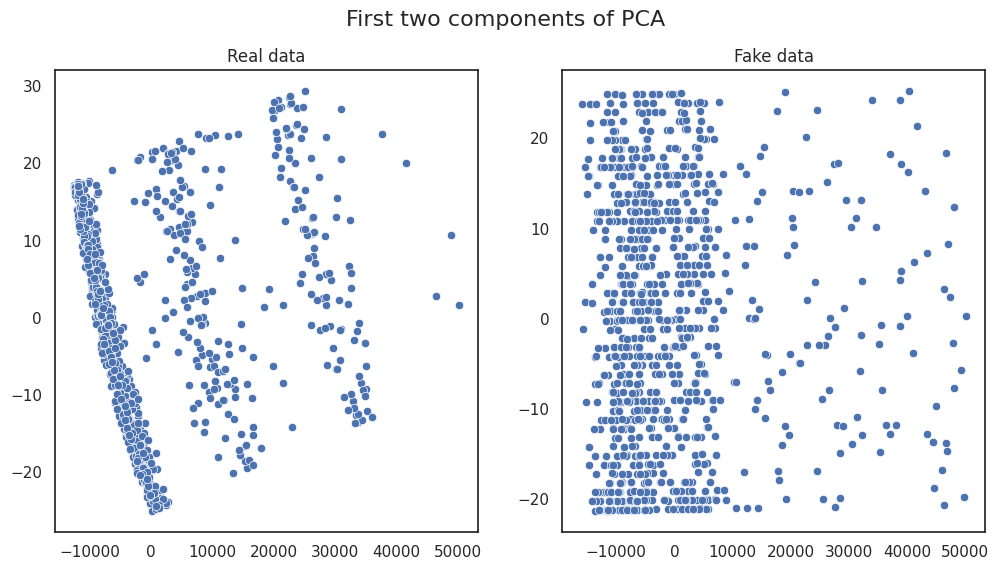

In [ ]:
"""Now we download a dataset that includes both continuous and discrete values. I chose a random dataset from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance"""

!gdown 1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ

import pandas as pd
data = pd.read_csv('./insurance.csv')

data

"""Next, we define a list with column names for categorical variables. This list will be passed to the model so that the model can decide how to process these fields."""

categorical_features = ['age','sex','children','smoker','region']

"""#Model training

Next, we simply define an instance of CTGANSynthesizer and call the fit method with the dataframe and the list of categorical variables.

We train the model for 300 epochs only as the discriminator and generator loss becomes quite low after these many epochs.
"""

from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 200)

"""#Synthetic data generation"""

samples = ctgan.sample(1000)

samples

"""#Evaluation"""

from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

In [ ]:
"""#Synthetic data generation"""

samples = ctgan.sample(4000000)

samples

,age,sex,bmi,children,smoker,region,charges
0,20,male,33.933021,3,no,southwest,10257.430542
1,53,female,23.671392,1,no,southeast,15517.085116
2,18,female,25.501752,0,no,southwest,5016.070272
3,46,female,24.140181,0,no,southeast,16444.398973
4,58,female,23.276216,4,no,northeast,9582.408846
...,...,...,...,...,...,...,...
3999995,56,female,21.300543,3,yes,northwest,5149.808618
3999996,50,male,36.198095,3,no,southeast,6117.198890
3999997,19,male,24.780487,0,no,southwest,14676.322650
3999998,20,female,27.362174,3,no,northeast,11442.417843


(1338, 7) (4000000, 7)


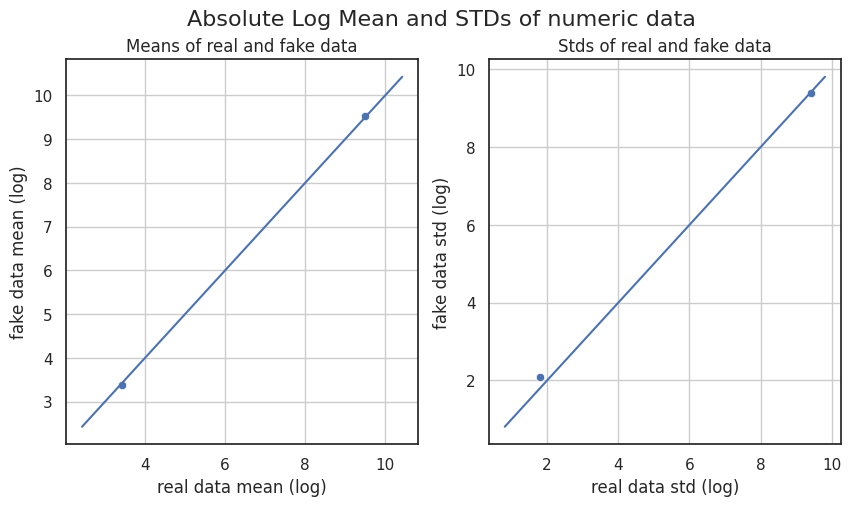

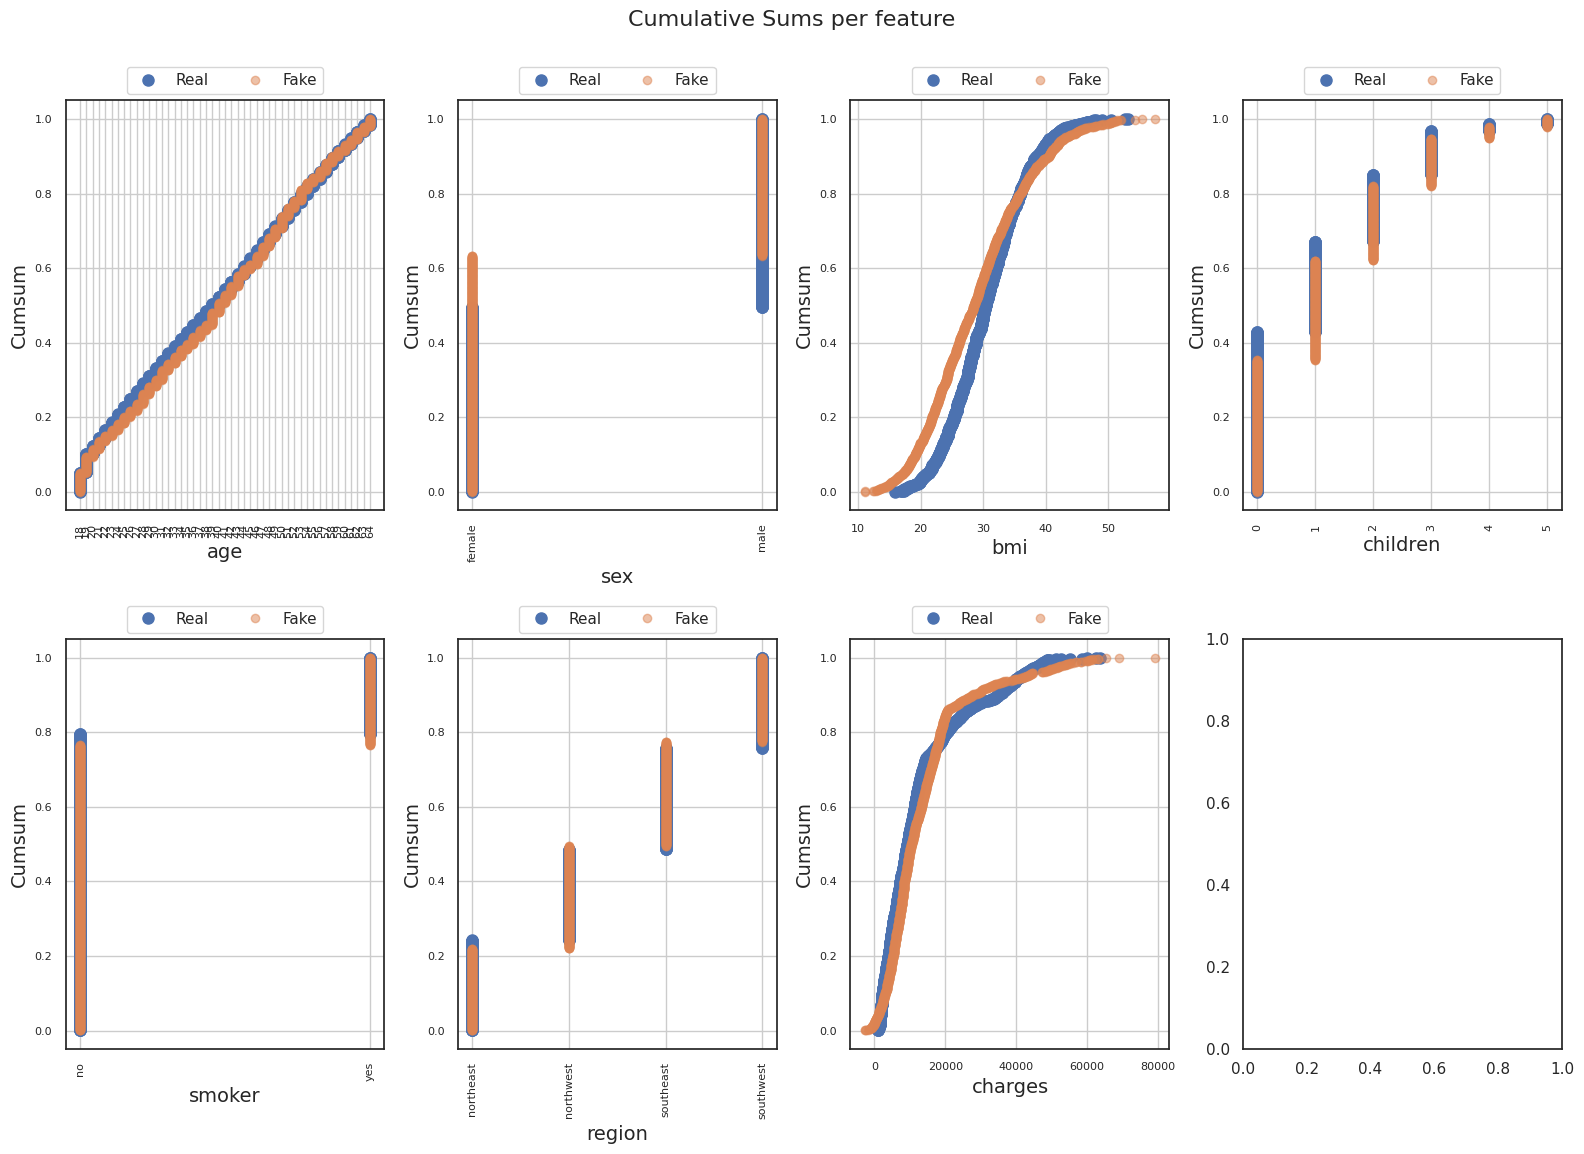

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormat

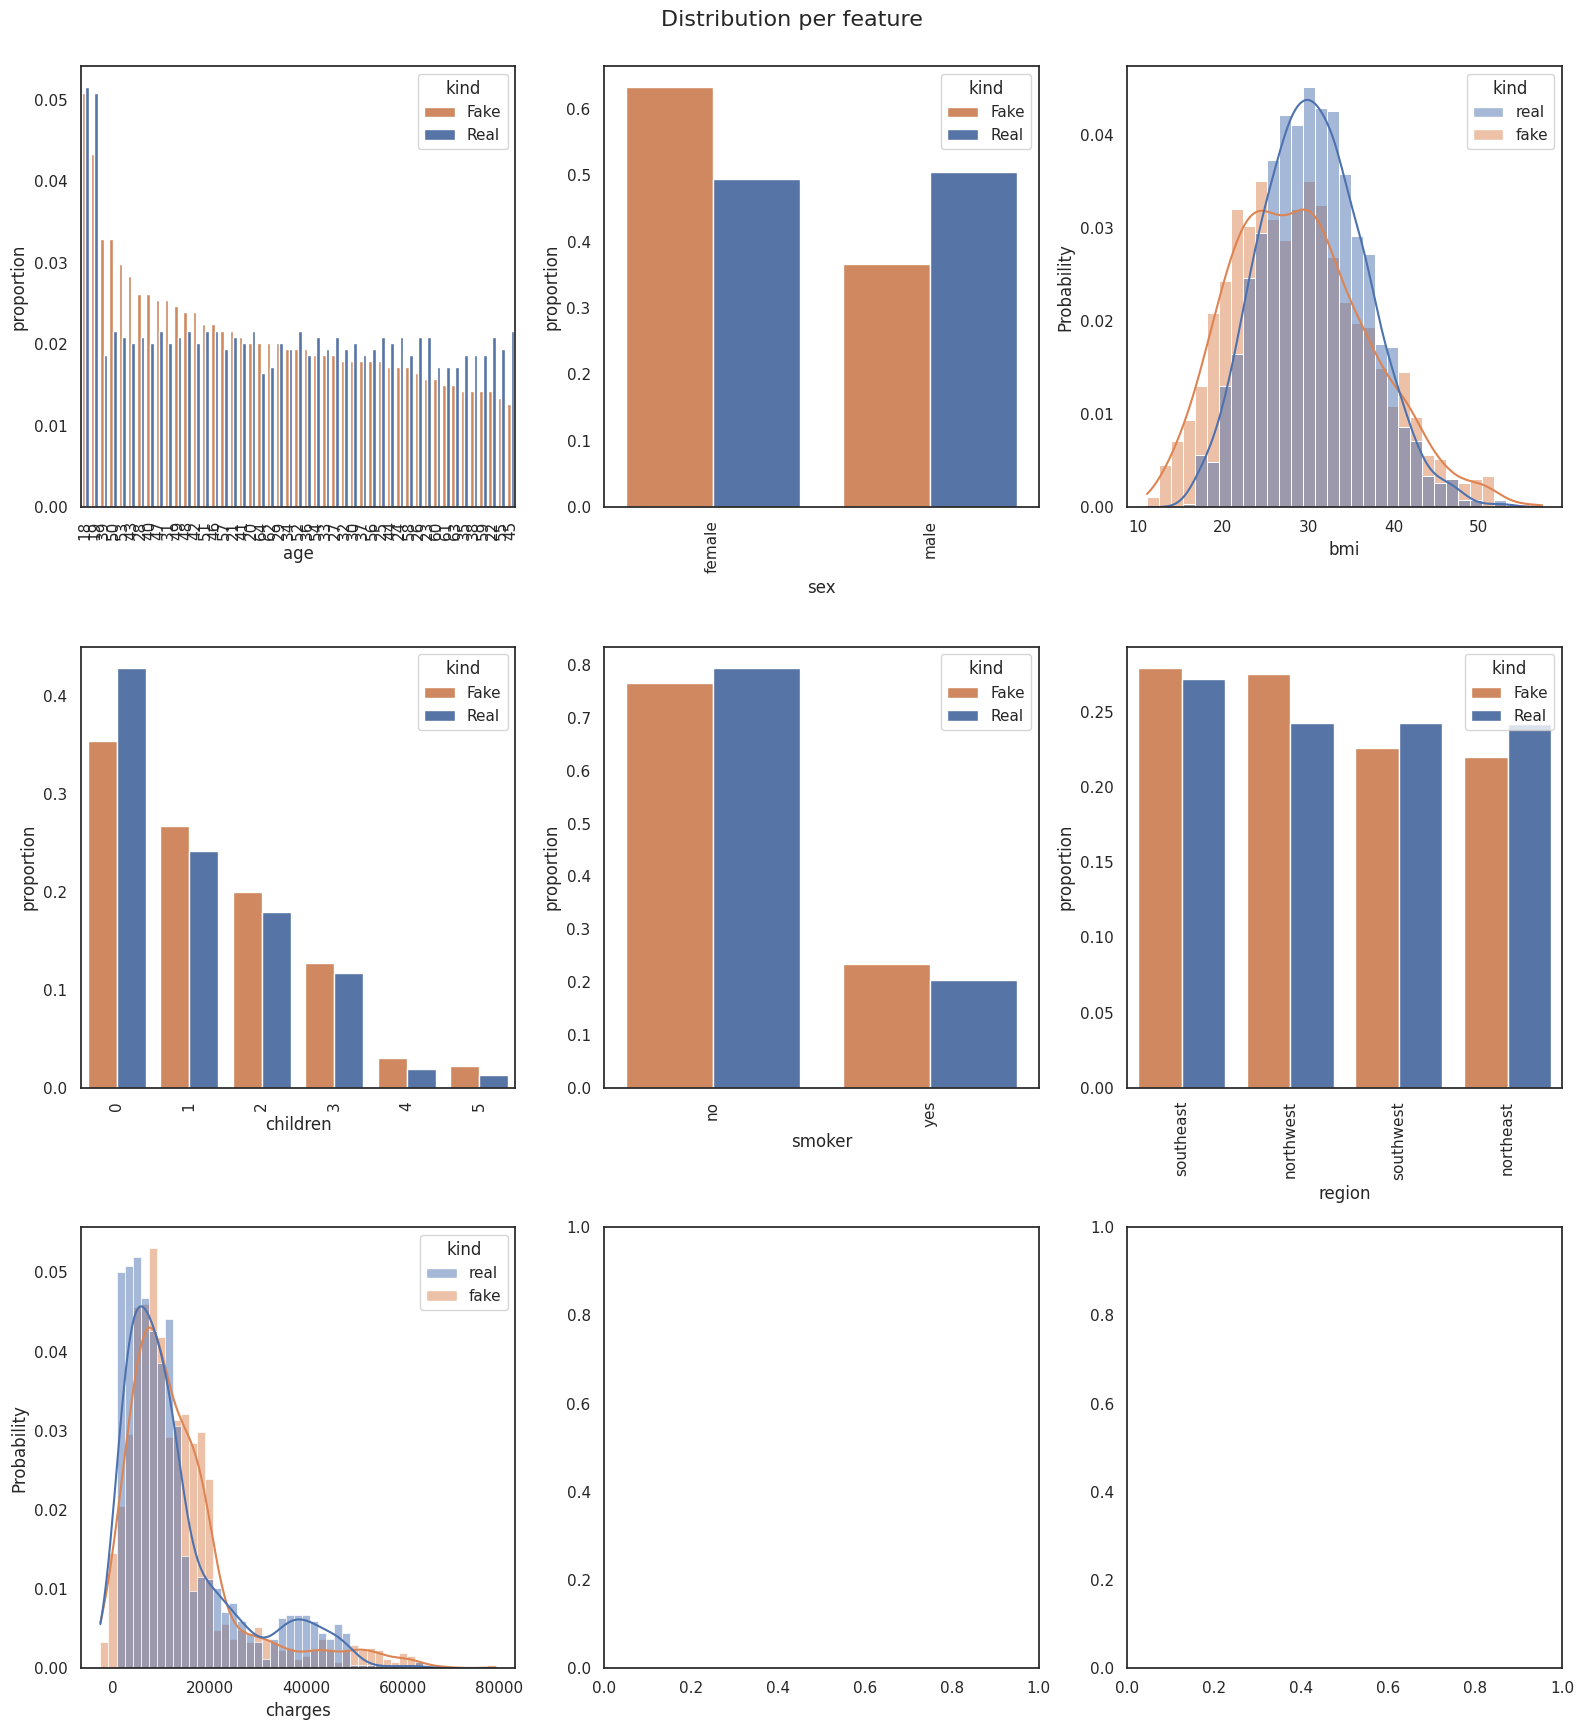

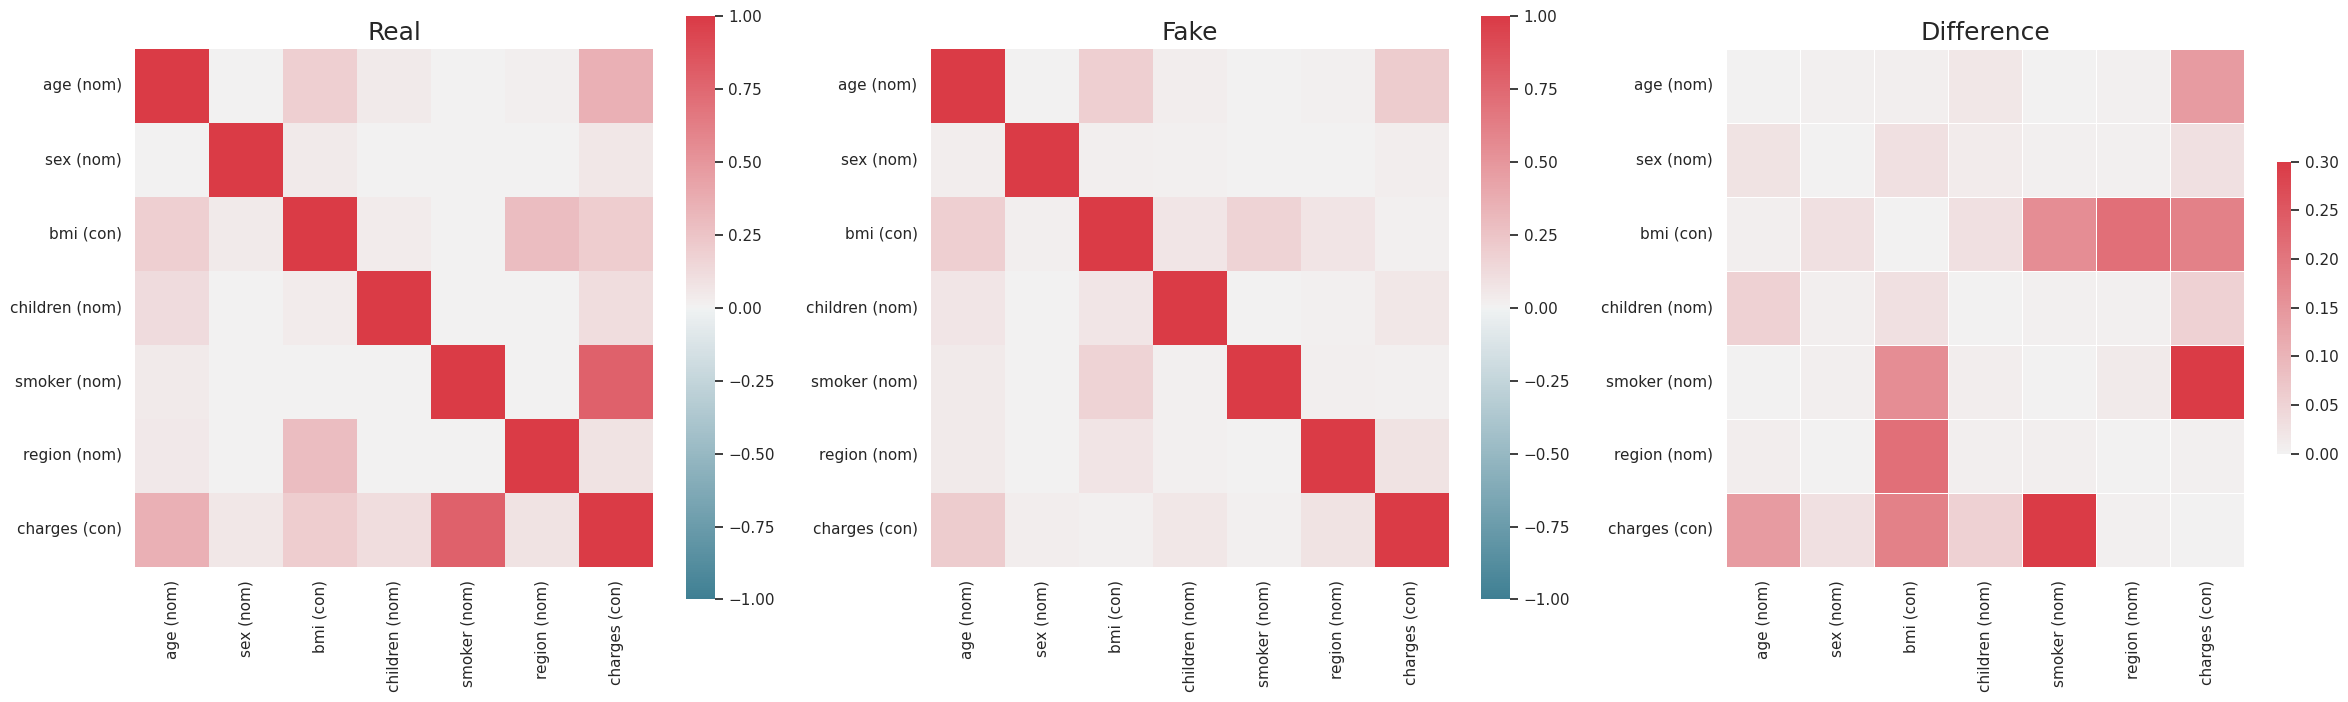

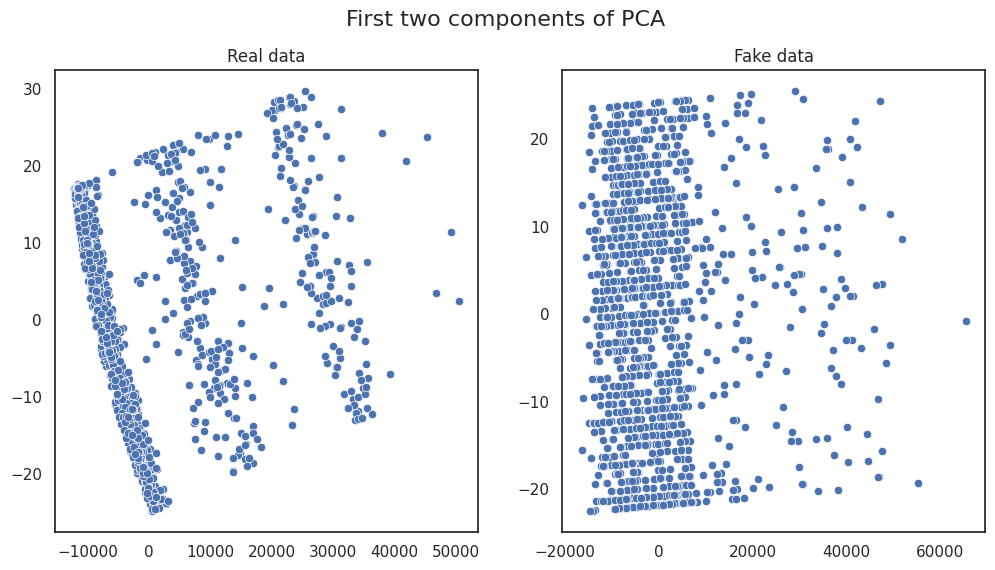

In [ ]:
"""#Evaluation"""

from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()